In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt 

In [2]:
#load in the grainsize timeseries
GS = pd.read_excel('../data/GrainSize/FRF_GrainSize.xlsx')
#print(GS.info())
GS.head()

,Year,Month,Day,xFRF_m,yFRF_m,d10_mm,d25_mm,d50_mm,d75_mm,d90_mm
0,2019,10,23,60,960,0.178825,0.213750,0.256512,0.304667,0.353318
1,2019,10,23,63,960,0.147380,0.193518,0.281950,0.361614,0.434300
2,2019,10,23,66,960,0.179093,0.239900,0.303989,0.368900,0.435100
3,2019,10,23,69,960,0.263261,0.305400,0.357083,0.416362,0.479047
4,2019,10,23,72,960,0.140110,0.180164,0.238270,0.299050,0.358365


In [3]:
#if month or day are single value, add a zero
GS['Month'] = GS['Month'].apply('{:0>2}'.format)
GS['Day'] = GS['Day'].apply('{:0>2}'.format)

In [4]:
#open text file of the scene based on the Year, Month, Day
#for examples: ../data/AeolisGrids/ML_grids/20191023.txt
GS['gridname'] = '../data/AeolisGrids/ML_grids/' + GS['Year'].astype('string') + GS['Month'].astype('string') +  GS['Day'].astype('string') +'.txt'
GS.head()


,Year,Month,Day,xFRF_m,yFRF_m,d10_mm,d25_mm,d50_mm,d75_mm,d90_mm,gridname
0,2019,10,23,60,960,0.178825,0.213750,0.256512,0.304667,0.353318,../data/AeolisGrids/ML_grids/20191023.txt
1,2019,10,23,63,960,0.147380,0.193518,0.281950,0.361614,0.434300,../data/AeolisGrids/ML_grids/20191023.txt
2,2019,10,23,66,960,0.179093,0.239900,0.303989,0.368900,0.435100,../data/AeolisGrids/ML_grids/20191023.txt
3,2019,10,23,69,960,0.263261,0.305400,0.357083,0.416362,0.479047,../data/AeolisGrids/ML_grids/20191023.txt
4,2019,10,23,72,960,0.140110,0.180164,0.238270,0.299050,0.358365,../data/AeolisGrids/ML_grids/20191023.txt


In [5]:
#Create the look up table to find the right index
xgrid =np.loadtxt('../data/AeolisGrids/x.txt')
ygrid =np.loadtxt('../data/AeolisGrids/y.txt')

#get first row of x.. this tells you what column to be in
xdim = xgrid[0, :]
#take first column of y . this tells you what row to be in
ydim = ygrid[:, 0]

In [6]:
#add empty column 
GS['GrainCategory'] = ''
GS.head()

,Year,Month,Day,xFRF_m,yFRF_m,d10_mm,d25_mm,d50_mm,d75_mm,d90_mm,gridname,GrainCategory
0,2019,10,23,60,960,0.178825,0.213750,0.256512,0.304667,0.353318,../data/AeolisGrids/ML_grids/20191023.txt,
1,2019,10,23,63,960,0.147380,0.193518,0.281950,0.361614,0.434300,../data/AeolisGrids/ML_grids/20191023.txt,
2,2019,10,23,66,960,0.179093,0.239900,0.303989,0.368900,0.435100,../data/AeolisGrids/ML_grids/20191023.txt,
3,2019,10,23,69,960,0.263261,0.305400,0.357083,0.416362,0.479047,../data/AeolisGrids/ML_grids/20191023.txt,
4,2019,10,23,72,960,0.140110,0.180164,0.238270,0.299050,0.358365,../data/AeolisGrids/ML_grids/20191023.txt,


In [7]:
#write a loop
for idx, row in GS.iterrows():
    #if file exists
    if os.path.exists(row['gridname']):
        #load the right grid
        name = row['gridname']
        grid = np.loadtxt(name)
        #grab the index of the array based on these look up tables.. 
        Xwhere = np.where(xdim == row['xFRF_m'])[0][0]
        Ywhere = np.where(ydim == row['yFRF_m'])[0][0]
        #get from the grid and put in dataframe
        Gvalue = grid[Ywhere,Xwhere]
        #print(Gvalue)
        #GS['GrainCategory'] = Gvalue
        GS.at[idx, 'GrainCategory'] = Gvalue

GS.head()

,Year,Month,Day,xFRF_m,yFRF_m,d10_mm,d25_mm,d50_mm,d75_mm,d90_mm,gridname,GrainCategory
0,2019,10,23,60,960,0.178825,0.213750,0.256512,0.304667,0.353318,../data/AeolisGrids/ML_grids/20191023.txt,1.0
1,2019,10,23,63,960,0.147380,0.193518,0.281950,0.361614,0.434300,../data/AeolisGrids/ML_grids/20191023.txt,1.0
2,2019,10,23,66,960,0.179093,0.239900,0.303989,0.368900,0.435100,../data/AeolisGrids/ML_grids/20191023.txt,1.0
3,2019,10,23,69,960,0.263261,0.305400,0.357083,0.416362,0.479047,../data/AeolisGrids/ML_grids/20191023.txt,1.0
4,2019,10,23,72,960,0.140110,0.180164,0.238270,0.299050,0.358365,../data/AeolisGrids/ML_grids/20191023.txt,1.0


In [8]:
#save csv 
GS.to_csv('../data/GrainsfromGrids.csv')

In [12]:
#make a box plot, but keep only 1, 2

list1 = [1,2]
  
fineCoarse = GS[GS.GrainCategory.isin(list1) == True]
fineCoarse = fineCoarse.rename(columns={"d10_mm": "D10","d25_mm": "D25", "d50_mm": "D50","d75_mm": "D75","d90_mm": "D90"})

dict = {1.0 : 'Normal', 2.0 : 'Coarse'}
fineCoarse=fineCoarse.replace({"GrainCategory": dict})

fineCoarse.head()


,Year,Month,Day,xFRF_m,yFRF_m,D10,D25,D50,D75,D90,gridname,GrainCategory
0,2019,10,23,60,960,0.178825,0.213750,0.256512,0.304667,0.353318,../data/AeolisGrids/ML_grids/20191023.txt,Normal
1,2019,10,23,63,960,0.147380,0.193518,0.281950,0.361614,0.434300,../data/AeolisGrids/ML_grids/20191023.txt,Normal
2,2019,10,23,66,960,0.179093,0.239900,0.303989,0.368900,0.435100,../data/AeolisGrids/ML_grids/20191023.txt,Normal
3,2019,10,23,69,960,0.263261,0.305400,0.357083,0.416362,0.479047,../data/AeolisGrids/ML_grids/20191023.txt,Normal
4,2019,10,23,72,960,0.140110,0.180164,0.238270,0.299050,0.358365,../data/AeolisGrids/ML_grids/20191023.txt,Normal


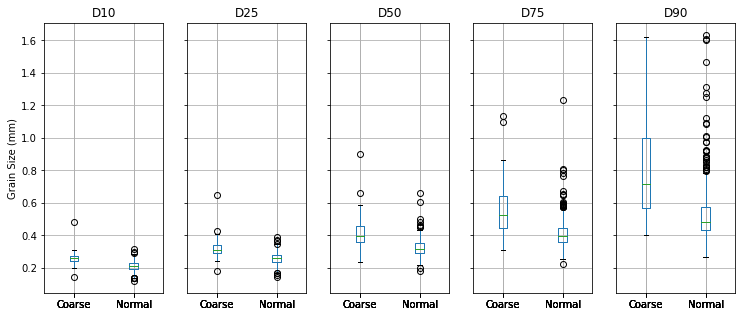

In [15]:

bbplot = fineCoarse.boxplot(column=['D10', 'D25','D50', 'D75','D90'],
                             by='GrainCategory',
                            layout=(1,5),
                            figsize=(12,5))

bbplot[0].set_ylabel('Grain Size (mm)')

bbplot[0].set_xlabel('')
bbplot[1].set_xlabel('')
bbplot[2].set_xlabel('')
bbplot[3].set_xlabel('')
bbplot[4].set_xlabel('')
#title_boxplot = ' title'
#plt.title( title_boxplot )
plt.suptitle('') # that's what you're after

plt.savefig('Boxplot.jpg', dpi = 300)
#change columns
#change title
#bold text


In [11]:
#KS test
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

#IF the p-value is lower than 0.05
#we reject the null hypothesis: the data were not drawn from the same distribution.


fine = GS[GS.GrainCategory.isin([1]) == True]
coarse = GS[GS.GrainCategory.isin([2]) == True]

print(stats.ks_2samp(fine['d10_mm'], coarse['d10_mm']))
print(stats.ks_2samp(fine['d25_mm'], coarse['d25_mm']))
print(stats.ks_2samp(fine['d50_mm'], coarse['d50_mm']))
print(stats.ks_2samp(fine['d75_mm'], coarse['d75_mm']))
print(stats.ks_2samp(fine['d90_mm'], coarse['d90_mm']))

KstestResult(statistic=0.5864153627311522, pvalue=1.800406656424055e-11)
KstestResult(statistic=0.5811522048364154, pvalue=2.950215007114566e-11)
KstestResult(statistic=0.5950213371266003, pvalue=7.957073635301614e-12)
KstestResult(statistic=0.5536273115220484, pvalue=3.537451452224805e-10)
KstestResult(statistic=0.5031294452347084, pvalue=2.169320360370603e-08)


## Scraps

In [12]:
grid = np.loadtxt(GS['gridname'][0])
print(grid)
print(grid.shape)

[[0. 0. 0. ... 3. 3. 3.]
 [0. 0. 0. ... 3. 3. 3.]
 [0. 0. 0. ... 3. 3. 3.]
 ...
 [0. 0. 3. ... 3. 3. 3.]
 [0. 0. 3. ... 3. 3. 3.]
 [0. 0. 3. ... 3. 3. 3.]]
(251, 81)


In [13]:
#find the class of the pixel at (xFRF_m, yFRF_m).. 

#First create the look up table to find the right index
xgrid =np.loadtxt('../data/AeolisGrids/x.txt')
ygrid =np.loadtxt('../data/AeolisGrids/y.txt')

#get first row of x.. this tells you what column to be in
xdim = xgrid[0, :]
#take first column of y . this tells you what row to be in
ydim = ygrid[:, 0]

print(xdim)
print(ydim)

[ 40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.
  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.
  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109.
 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.]
[ 800.  801.  802.  803.  804.  805.  806.  807.  808.  809.  810.  811.
  812.  813.  814.  815.  816.  817.  818.  819.  820.  821.  822.  823.
  824.  825.  826.  827.  828.  829.  830.  831.  832.  833.  834.  835.
  836.  837.  838.  839.  840.  841.  842.  843.  844.  845.  846.  847.
  848.  849.  850.  851.  852.  853.  854.  855.  856.  857.  858.  859.
  860.  861.  862.  863.  864.  865.  866.  867.  868.  869.  870.  871.
  872.  873.  874.  875.  876.  877.  878.  879.  880.  881.  882.  883.
  884.  885.  886.  887.  888.  889.  890.  891.  892.  893.  894.  895.
  89

In [14]:
#grab the index of the array based on these look up tables.. 
#so here it is 60, 960 in this case.
Xwhere = np.where(xdim==60)[0][0]
Ywhere = np.where(ydim==960)[0][0]

print(Xwhere)
print(Ywhere)

20
160


In [15]:
#pull that value out of the array
# 0,1 use sand    -- (0 = vegetation, 1 = sand,)
# 2,3 use coarse  -- (2 = coarse sediment, 3 = water)
Graincat = grid[Ywhere,Xwhere]
print(Graincat)

1.0


In [16]:
#just to look at the unique values
GS['ymd'] = GS['Year'].astype('string') +'_' + GS['Month'].astype('string') +'_' +  GS['Day'].astype('string')
sceneArray = GS['ymd'].unique()
scenes = pd.DataFrame(sceneArray,columns = ['ymd_ListofScenes'] )
scenes.head()

,ymd_ListofScenes
0,2019_10_23
1,2019_10_30
2,2019_11_07
3,2019_11_14
4,2019_11_21
